### Methodology

The methodology we will be deploying for this our analysis is called the CRIP-DM(Cross industry standard process for data mining) methodology;

1. Business Understanding
2. Data Understanding
3. Data Preparation.
4. Data Modelling
5. Model Evaluation and 
6. Model Deployment

### Import Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set visualization
sns.set()

In [41]:
# Load in Data Set
df = pd.read_csv("Jewelry_Dataset.csv")

df.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quality",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",

]

In [42]:
df.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [43]:
# check for missing values
df.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quality           0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [44]:
df.shape

(95910, 13)

In [45]:
# Feature Cadinality
df.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quality           1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [46]:
# Data Description
df.describe()

,Order_ID,Product_ID,SKU_Quality,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [47]:
# More information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quality     95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [48]:
# check for duplicate
num_duplicate = len(df.loc[df.duplicated()])
print(f"Number of duplicated records:", num_duplicate)

Number of duplicated records: 2589


In [49]:
# Check for features with a cardinality of 1(Invariant features)
invarient_features = df.nunique()[df.nunique() == 1].index.tolist()
invarient_features

['SKU_Quality']

In [50]:
# Check for label distibution, our label in this case is Price_USD
df["Price_USD"].skew()

18.95906072625981

In [51]:
df["Price_USD"].kurtosis()

1054.8979068506155

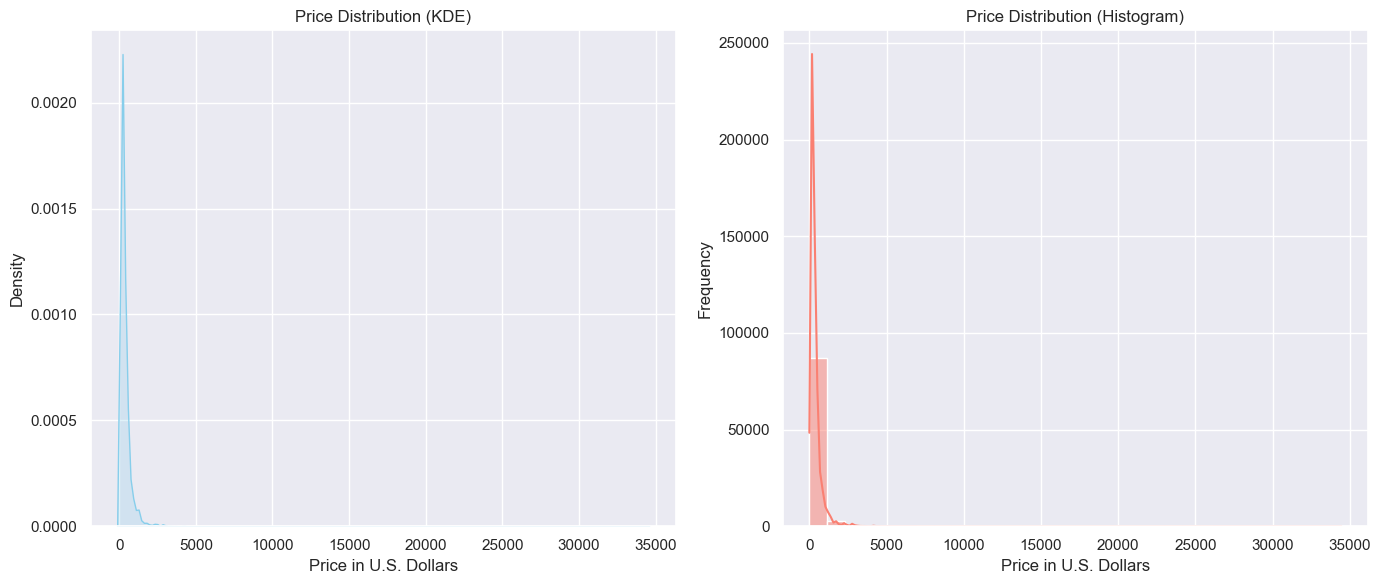

In [52]:
# Visualise the skweness of the Price distribution using both KDE and Hist
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# KDE Plot
plt.subplot(1, 2, 1)
sns.kdeplot(x="Price_USD", data=df, fill=True, color='skyblue')
plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Density")
plt.title("Price Distribution (KDE)")

# Histogram Plot
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="Price_USD", bins=30, kde=True, color='salmon')
plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Frequency")
plt.title("Price Distribution (Histogram)")

plt.tight_layout()
plt.show()


In [53]:
#Target Gender analysis
df["Target_Gender"].value_counts()

f    47379
m      364
Name: Target_Gender, dtype: int64

In [54]:
df["Target_Gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

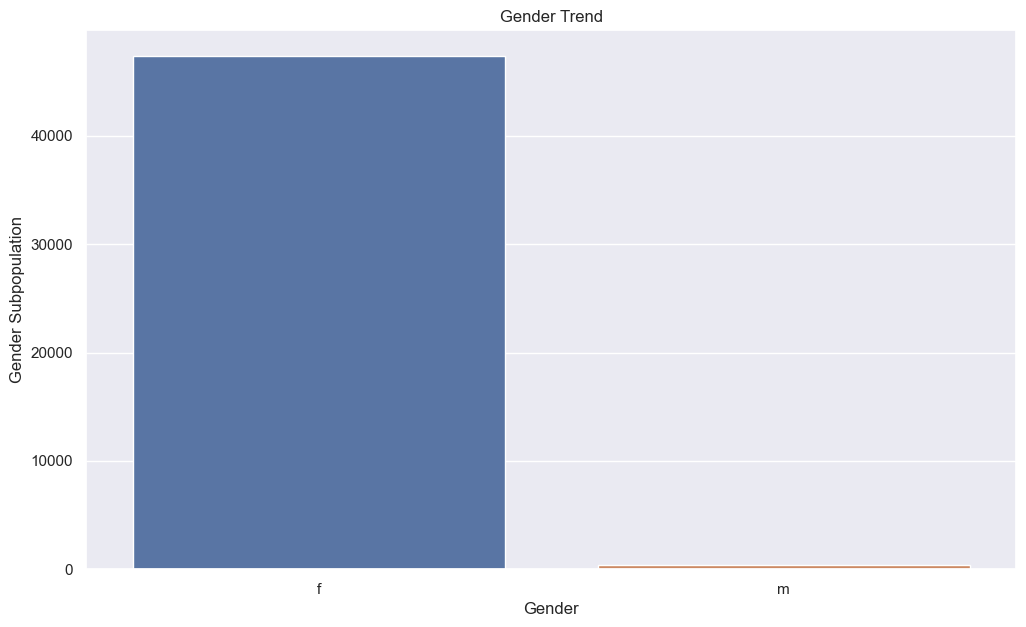

In [55]:
# Visualize 
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")
plt.title("Gender Trend")
plt.show(); plt.close()

In [56]:
# Jewelry Category Analysis
df["Category"].value_counts()

jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category, Length: 218, dtype: int64

In [57]:
df["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [58]:
# Extract the actual category
categories = df["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c.lower()]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [59]:
# Pick out authentic data based on category
real_categories = df.loc[df["Category"].isin(categories)]
real_categories

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2719009022110859402,1956663836207481431,1,1.806829e+18,jewelry.ring,0.0,145.62,1.515916e+18,NaN,red,gold,NaN
95903,2021-12-01 09:37:28 UTC,2719011482355368159,1956663847389495299,1,1.806829e+18,jewelry.earring,0.0,301.23,1.515916e+18,NaN,red,gold,amethyst
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.0,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit


In [61]:
# Percentage of missing values
100 * df.isnull().sum() / len(df)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quality        0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [62]:
# Percentage of missing values of category
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quality        0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

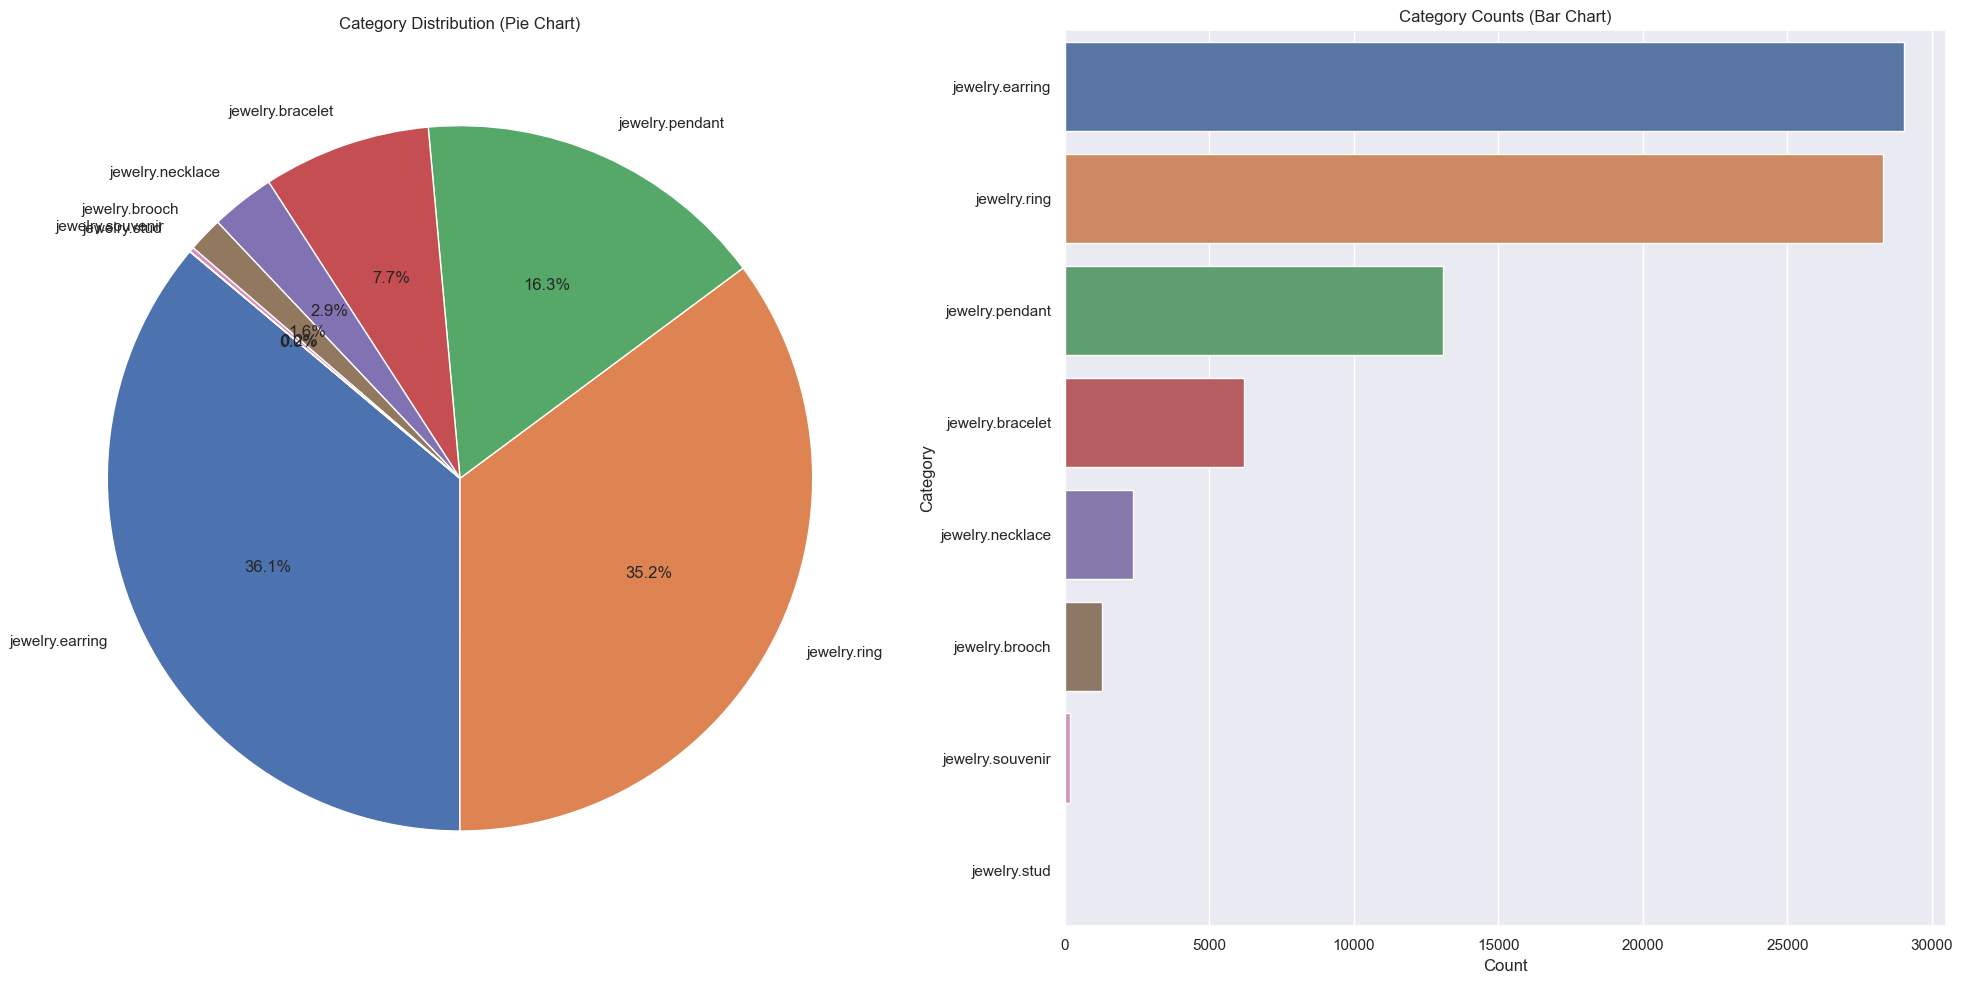

In [64]:
# Visualize Jewelry Category using pie and countplots
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts
subdata = real_categories["Category"].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

# Create subplots
plt.figure(figsize=(20, 10))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(x=counts, labels=jewelry_categories, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution (Pie Chart)")

# Countplot
plt.subplot(1, 2, 2)
sns.countplot(data=real_categories, y="Category", order=subdata.index)
plt.title("Category Counts (Bar Chart)")
plt.xlabel("Count")
plt.ylabel("Category")

plt.tight_layout()
plt.show()


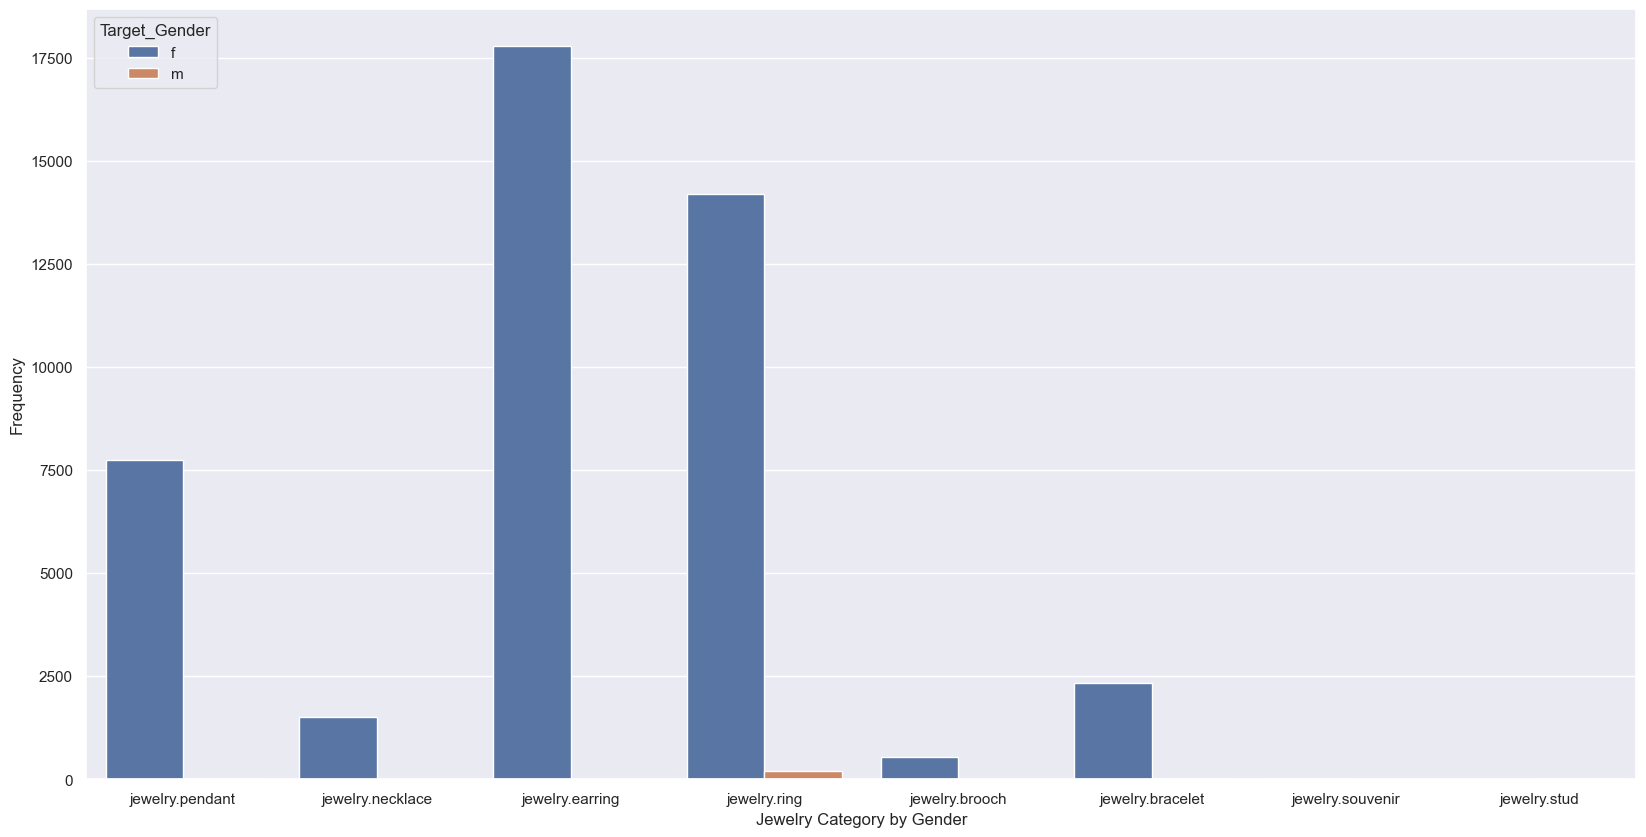

In [67]:
# Jewelry Category by Gender
plt.figure(figsize = (20, 10))
sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel("Jewelry Category by Gender")
plt.ylabel("Frequency")
plt.show(); plt.close()

In [69]:
# Gender Skew in Original data
df["Target_Gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

In [70]:
# Gender Skew in category data
real_categories["Target_Gender"].value_counts(normalize = True)

f    0.994434
m    0.005566
Name: Target_Gender, dtype: float64

In [71]:
encoded, category_coded = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_1439/832916917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Category"] = encoded


In [72]:
encoded, category_coded = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_1439/1129073632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Target_Gender"] = encoded


In [73]:
encoded, category_coded = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_1439/2207337752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Gem"] = encoded


In [74]:
encoded, category_coded = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_1439/2809269004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Color"] = encoded


In [75]:
encoded, category_coded = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_1439/1403979749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Metal"] = encoded


In [76]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [77]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quality     80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  int64  
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  int64  
 10  Main_Color      80458 non-null  int64  
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 8.6+ MB


In [79]:
correlations = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_ID"], axis = 1).corr(method = "spearman")
correlations

,SKU_Quality,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


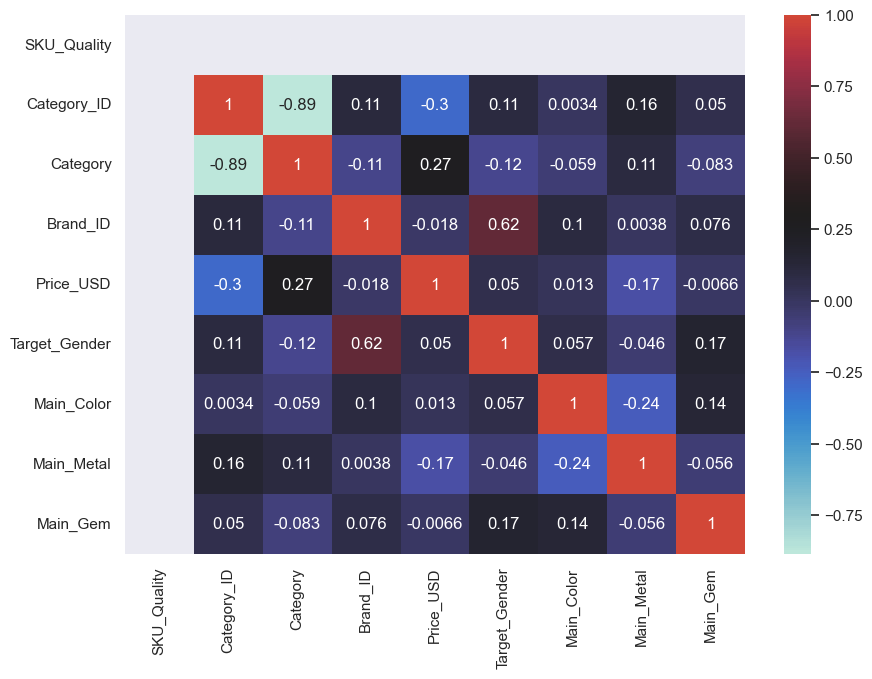

In [81]:
# Visualize Correlation
plt.figure(figsize = (10, 7))
sns.heatmap(correlations, annot = True, center = .3)
plt.show(); plt.close()

In [82]:
#set correlation limits
upper = 1
lower = .2

In [87]:
# Explicitly obtain the correlated features
correlated_column = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}
correlated_column

{'SKU_Quality': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

### Data Implication

Implied by our findings above, we can say the following:
1. Missing Values: There are a lot of missing values in the dataset. This may be fixed either by value imputation or missing ness encoding
2. Data corruption: Some variables(e.g, jewelry_category) contain corrupt values
3. Rare values: Some feature have some valiues that occur rarely. A prime instance of this is the Target_Gender column, where the male gender is rarely represented. Sometimes, there are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is geberated.
4. Low Cardinality or feature invarience: The SKU_Quantity feature only has one unique value(e.g 1). This feature provides no new information.
5. Target skew: The target variable is hightly right-skewed. Thus can represent an issue during training.
6. Correlation: Ofr the most part, the feature exhibit low multicolinearity, hence ensuring feature dependence. However the target variable exhibit a low correlation with the independent variables.

### Data Preparation

In [88]:
# columns to eliminate
columns_to_eliminate = [
    "SKU_Quality",
    "Order_ID",
    "Product_ID",
    "User_ID",
    "Category_ID"
]

In [89]:
df.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [90]:
df.shape

(95910, 8)

In [92]:
df.drop(labels = ["Order_Datetime"], axis = 1, inplace = True)

In [93]:
df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [94]:
df = df.loc[df["Category"].isin(categories), :]

In [95]:
df.shape

(80458, 7)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Separate features from labels
x, y = df.drop(labels = ["Price_USD"], axis = 1), df["Price_USD"]

In [118]:
# Create test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [125]:
x_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
64746,jewelry.earring,0.0,f,red,gold,NaN
19422,jewelry.pendant,2.0,f,red,gold,topaz
70978,jewelry.pendant,0.0,NaN,red,gold,diamond
67987,jewelry.ring,1.0,f,red,gold,diamond
19387,jewelry.earring,1.0,f,white,gold,diamond


In [126]:
y_train.head()

64746    254.66
19422     95.75
70978    164.25
67987    198.49
19387    547.81
Name: Price_USD, dtype: float64

### Data Modelling
We will be making use of the following models
1. Linear regression
2. Extremely Random forest
3. Adaptive boosting(AdaBoost), and
4. Catboost

In [119]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
#from catboost import CatBoostRegressor

In [120]:
from sklearn.pipeline import Pipeline

In [136]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    steps = []
    
    if fill_missing:
        steps.append(("first", first_transformer))
        
    if label_encode:
        steps.append(("third", third_transformer))
        
    if one_hot:
        steps.append(("second", second_transformer))
        
    steps.append(("model", model))
        
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [129]:
x.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [130]:
# Generate indices
columns = x.columns.tolist()

columns_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]
categorical_indices
                        

[0, 2, 3, 4, 5]

In [113]:
# Catboost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    columns_indices,
    categorical_indices,
    filling_missing = False, one_hot = False, label_encode = True
)

NameError: name 'CatBoostRegressor' is not defined

In [137]:
# Linear regression pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    columns_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [139]:
#Adaboost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = .01),
    columns_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [141]:
# Extra Trees
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    columns_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [112]:
from sklearn.preprocessing import PowerTransformer

In [143]:
# Transform Target
#cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))

In [ ]:
#Fit catboost
cat_pipe.fit(x_train, y_train)

In [144]:
# Fit LR
lin_pipe.fit(x_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [145]:
# Fit Ada
ada_pipe.fit(x_train, y_train)

ValueError: Input X contains NaN.
AdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Fit Extra
exra_pipe.fit(x_train, y_train)